In [123]:
import pandas as pd
import numpy as np
from utils import read_neutouch_raw
import matplotlib.pyplot as plt

In [124]:
# how does samples look like?

In [125]:
data_dir = '/datasets/sensory_ext/data/neutouch/food'

In [126]:
def correct_dir(curr_dir):
    return f'{data_dir}/{curr_dir[54:]}'

df_ess = pd.read_csv(f'{data_dir}/nt_essentials.csv', names=['dir', 't', 'obj'])
df_ess.dir = df_ess.dir.apply(correct_dir)

In [127]:
def plot_all(df, ax, taxels='all'):
    df.loc[df.isPos == 0, ['isPos']] = -1
    if taxels == 'all':
        ax.plot(df.t, df.isPos.cumsum().values)
    elif taxels == 'pos':
        ax.plot(df[df.isPos==1].t, df[df.isPos==1].isPos.cumsum().values)
    elif taxels == 'neg':
        ax.plot(df[df.isPos==-1].t, df[df.isPos==-1].isPos.cumsum().values)

In [128]:
def select_by_index(ind):
    fname, t, obj = df_ess.iloc[ind]
    return read_neutouch_raw(fname), t, obj

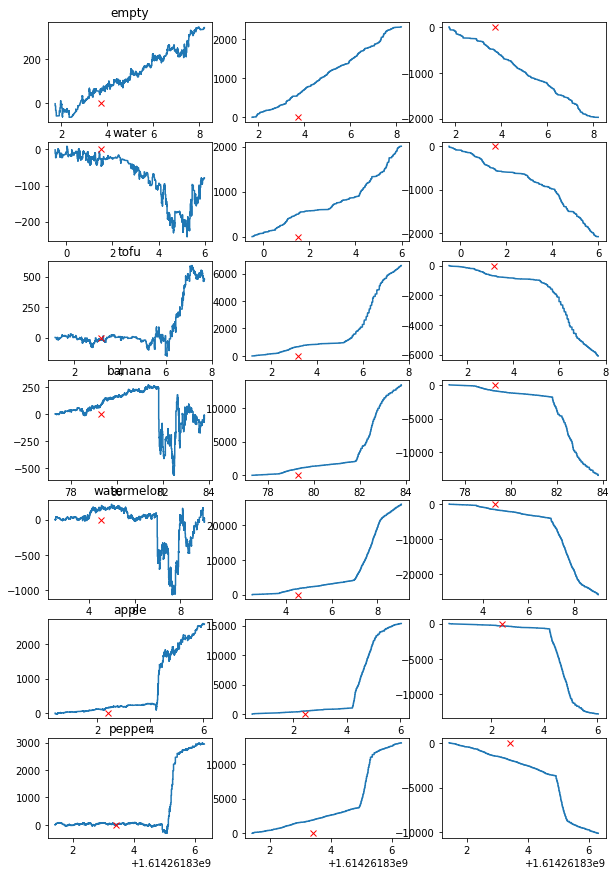

In [129]:
indices = [20,53,45,10,65,3,108]

fig, ax = plt.subplots(nrows=7, ncols=3, figsize=(10,15))
for i, ind in enumerate(indices):
    sample, t, obj = select_by_index(ind)
    plot_all(sample, ax[i][0])
    plot_all(sample, ax[i][1], taxels='pos')
    plot_all(sample, ax[i][2], taxels='neg')
    ax[i][0].plot(t, 0, 'rx')
    ax[i][1].plot(t, 0, 'rx')
    ax[i][2].plot(t, 0, 'rx')
    ax[i][0].set_title(obj)

In [130]:
# let's see spike counts
info = []
for ind in range(df_ess.shape[0]):
    sample, t, obj = select_by_index(ind)
    pos_sc = sample[sample.isPos == 1].shape[0]
    neg_sc = sample[sample.isPos == 0].shape[0]
    info.append([obj, pos_sc, neg_sc, pos_sc+neg_sc])

In [131]:
df = pd.DataFrame(columns=['obj', 'pos', 'neg', 'total'], data=info)

In [134]:
import seaborn as sns
sns.set_theme(style="whitegrid")

<AxesSubplot:xlabel='obj', ylabel='total'>

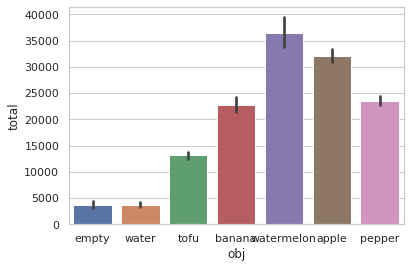

In [137]:
fig, ax = plt.subplots()
sns.barplot(ax=ax, data=df, x='obj', y='total', order=['empty', 'water', 'tofu',  'banana', 'watermelon', 'apple', 'pepper'])